### Modern Portfolio Theory (MPT)
MPT is a theory on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. Its primary insight is that an asset's risk and return should not be assessed in isolation but in terms of how it contributes to a portfolio's overall risk and return.

### Key concepts:

1. Expected Returns: The returns an investor expects to earn from an investment in the future.
2. Covariance and Correlation: These measure how the return on one asset varies relative to the return on another. In essence, it helps in understanding how assets move in relation to each other.
3. Efficient Frontier: A graphical representation of all possible combinations of assets that provide the best return for a set level of risk.


In [2]:
# 1 import necessary library
import pandas as pd
import numpy as np
import yfinance as yf
from pypfopt import EfficientFrontier, risk_models, expected_returns, CLA, plotting
import matplotlib.pyplot as plt

In [7]:
# 2 Fetching stock data using Yahoo Finance
tickers = "AAPL AMD AKAM JNJ KEY AMZN GRMN UA PG KMB CPB XOM MRO NEE AES CNP AMT ARE SLG O GE TXT AOS NEM FMC CFG GOOGL FOXA"
data = yf.download(tickers=tickers, period='10y')
df = data.Close.ffill()

[*********************100%%**********************]  28 of 28 completed


In [19]:
ticker_list = tickers.split()  # Splits the string at each space
count = len(ticker_list)
print(count)

28


In [8]:
# 3 Calculate Expected Returns & Covaiance Matrix
""" 
Using historical data:

mean_historical_return(): computes the annualized mean historical return.
sample_cov(): computes the sample covariance matrix.
"""

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [12]:
# 4 EfficientFrontier (mu, S)
"""
An EfficientFrontier object is created using the expected returns (mu) 
and the sample covariance matrix (S). 
This object allows us to compute portfolios 
that maximize the Sharpe ratio (return per unit of risk).
"""

ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe() # portfolio with max Sharpe ratio
cleaned_weights = ef.clean_weights() # round-off weights
ef.portfolio_performance(verbose=True) # return, volatility, Sharpe ratio

Expected annual return: 25.9%
Annual volatility: 27.1%
Sharpe Ratio: 0.88


(0.25861974618577876, 0.2707356046605549, 0.8813755637532691)

Expected annual return: 24.5%
Annual volatility: 25.6%
Sharpe Ratio: 0.88


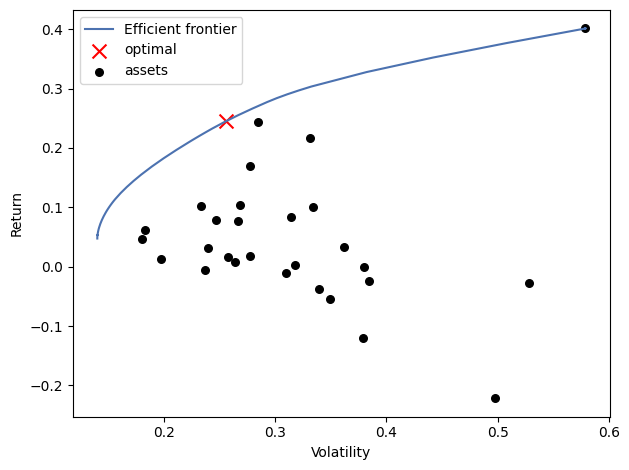

In [16]:
# 5 CLA (Critical Line Algorithm)
"""
It's another method to optimize portfolios and calculate the efficient frontier. 
It's particularly useful when the number of assets is large.
"""

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True)
ax = plotting.plot_efficient_frontier(cla, showfig = False)

/Users/rotehut/Desktop/vs_proj/port_mgmt/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


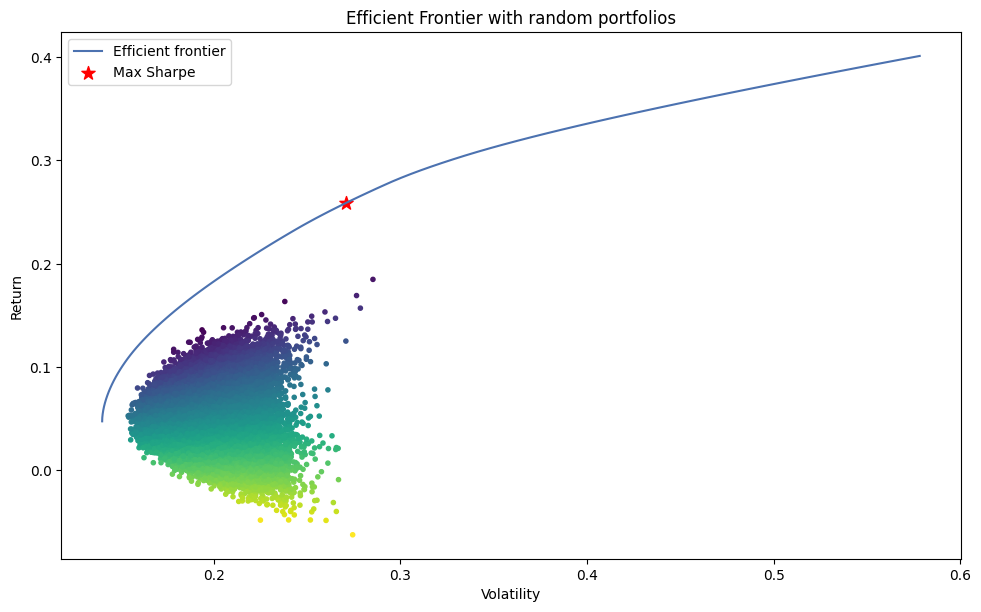

In [17]:
# 6 Visualization of Efficient Frontier / Max Sharpe
"""
Random portfolios are generated to visualize the universe of potential portfolios.
The efficient frontier represents the portfolios that offer the highest expected return for a given level of risk. 
The max Sharpe portfolio is highlighted on this plot.
"""

n_samples = 100000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds


# Plot efficient frontier with Monte Carlo sim
ef_plot = EfficientFrontier(mu, S)  # Create a separate instance for plotting

fig, ax = plt.subplots(figsize=(10,6))
plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=False)

# Create a new instance for finding the tangency portfolio
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.show()


/Users/rotehut/Desktop/vs_proj/port_mgmt/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


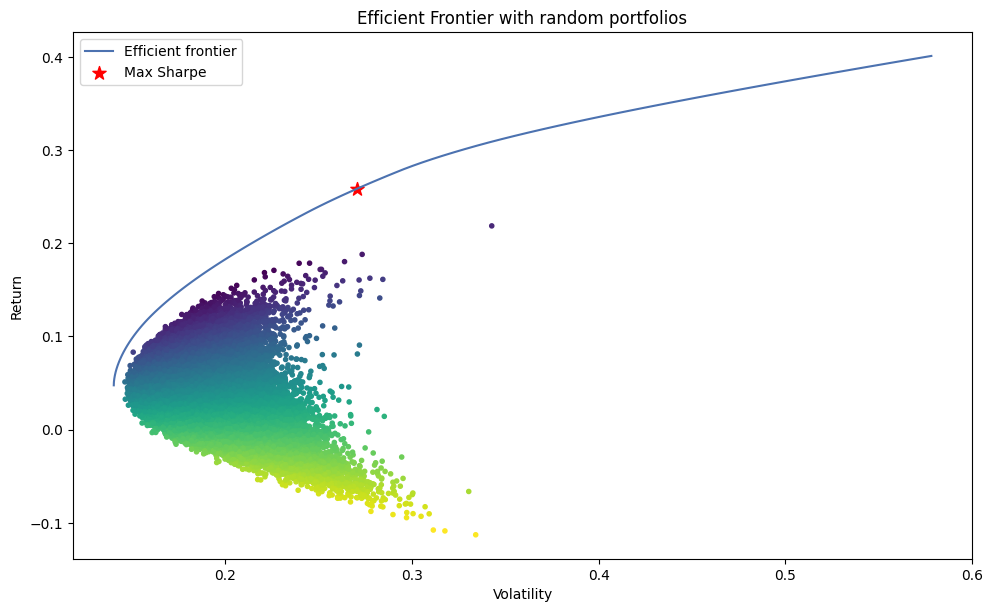

In [20]:
test2 = np.random.random(count)

n_samples = 200000
w = np.random.dirichlet(test2, n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

# Create an instance of EfficientFrontier for plotting
ef_plot = EfficientFrontier(mu, S)

fig, ax = plt.subplots(figsize=(10,6))
plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=False)

# Create a new instance of EfficientFrontier for computing max sharpe
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Fo,rmat
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.show()


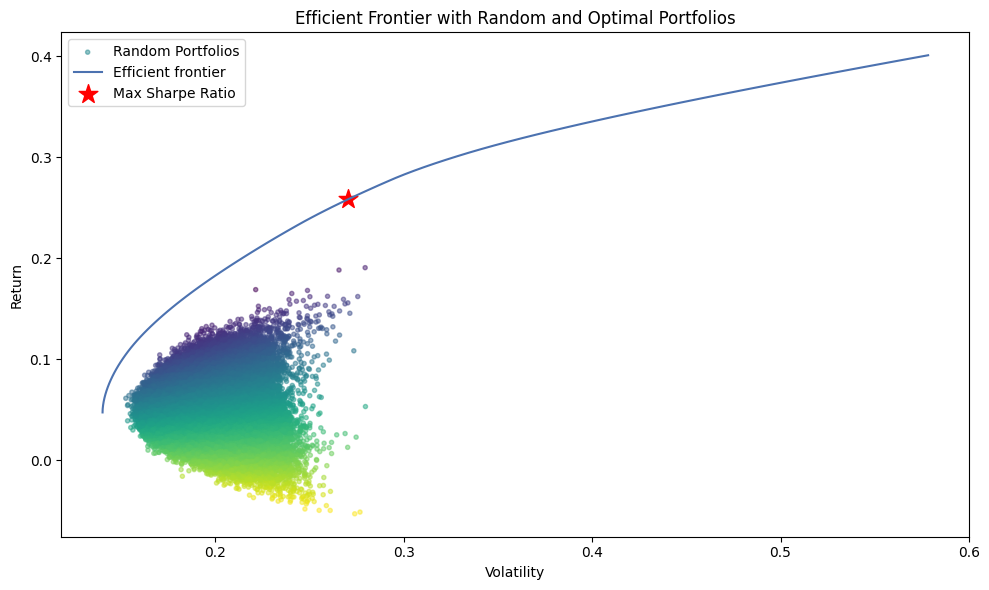

In [21]:
### CLEAN WEIGHTS

# Generate random portfolios
n_samples = 200000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)  # Assuming 'mu' is the expected returns for your assets
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

# Initialize EfficientFrontier for Max Sharpe Portfolio
ef_max_sharpe = EfficientFrontier(mu, S)
raw_weights = ef_max_sharpe.max_sharpe()
cleaned_weights = ef_max_sharpe.clean_weights()
ret_max_sharpe, std_max_sharpe, _ = ef_max_sharpe.portfolio_performance()

# Plot
fig, ax = plt.subplots(figsize=(10,6))

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r", alpha=0.5, label="Random Portfolios")

# Plot Efficient Frontier using a fresh EfficientFrontier instance
ef_plot = EfficientFrontier(mu, S) 
plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=False)

# Highlight Max Sharpe Portfolio
ax.scatter(std_max_sharpe, ret_max_sharpe, marker="*", color="red", s=200, label="Max Sharpe Ratio")

# Formatting
ax.set_title("Efficient Frontier with Random and Optimal Portfolios")
ax.legend()
plt.tight_layout()
plt.show()

In [23]:
# 7 Portfolios Weights - Shortable
"""
By default, the weight bounds are set between 0 and 1, meaning you can only go long on assets. 
By setting the bounds between -1 and 1, you're allowed to short assets.
"""

ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
raw_weights_shortable = ef.max_sharpe()
raw_weights_shortable

OrderedDict([('AAPL', 1.0),
             ('AES', -0.3220714809663389),
             ('AKAM', -0.0686717315879757),
             ('AMD', 0.3476069317337486),
             ('AMT', 0.0405364487243084),
             ('AMZN', 0.2384544881940234),
             ('AOS', 0.5955224279997056),
             ('ARE', -0.3445357994702502),
             ('CFG', 0.6177636582317879),
             ('CNP', -0.1965273555232472),
             ('CPB', -0.2905868950578074),
             ('FMC', -0.6037566652196337),
             ('FOXA', -0.5839135926904396),
             ('GE', -0.3878488334895308),
             ('GOOGL', 0.2804586029481711),
             ('GRMN', 0.0726820229027671),
             ('JNJ', -0.2782392390839382),
             ('KEY', -0.3203176323007954),
             ('KMB', -0.6915742417377061),
             ('MRO', -0.0947637900178923),
             ('NEE', 0.9715349353519014),
             ('NEM', 0.0020576881571536),
             ('O', 0.6400902346901296),
             ('PG', 0.50711236246

In [24]:
# 8 Portfolios Weights - Neutral to Positive Range
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
raw_weights_shortable = ef.max_sharpe()
raw_weights_shortable

OrderedDict([('AAPL', 0.5795033458115286),
             ('AES', 0.0),
             ('AKAM', 0.0),
             ('AMD', 0.1954238531170181),
             ('AMT', 0.0),
             ('AMZN', 0.1348634148350076),
             ('AOS', 0.0),
             ('ARE', 0.0),
             ('CFG', 0.0),
             ('CNP', 0.0),
             ('CPB', 0.0),
             ('FMC', 0.0),
             ('FOXA', 0.0),
             ('GE', 0.0),
             ('GOOGL', 0.0),
             ('GRMN', 0.0),
             ('JNJ', 0.0),
             ('KEY', 0.0),
             ('KMB', 0.0),
             ('MRO', 0.0),
             ('NEE', 0.0902093862364457),
             ('NEM', 0.0),
             ('O', 0.0),
             ('PG', 0.0),
             ('SLG', 0.0),
             ('TXT', 0.0),
             ('UA', 0.0),
             ('XOM', 0.0)])

In [31]:
# 8 Portfolios Weights - CAPPED MAX
ef = EfficientFrontier(mu, S, weight_bounds=(0, 0.3))
raw_weights_shortable = ef.max_sharpe()
raw_weights_shortable

OrderedDict([('AAPL', 0.3),
             ('AES', 0.0),
             ('AKAM', 0.0),
             ('AMD', 0.2157648801434799),
             ('AMT', 0.0),
             ('AMZN', 0.2229453708545325),
             ('AOS', 0.0),
             ('ARE', 0.0),
             ('CFG', 0.0),
             ('CNP', 0.0),
             ('CPB', 0.0),
             ('FMC', 0.0),
             ('FOXA', 0.0),
             ('GE', 0.0),
             ('GOOGL', 0.054798851989067),
             ('GRMN', 0.0),
             ('JNJ', 0.0),
             ('KEY', 0.0),
             ('KMB', 0.0),
             ('MRO', 0.0),
             ('NEE', 0.2064908970129208),
             ('NEM', 0.0),
             ('O', 0.0),
             ('PG', 0.0),
             ('SLG', 0.0),
             ('TXT', 0.0),
             ('UA', 0.0),
             ('XOM', 0.0)])

In [30]:
# 8 Portfolios Weights - CAPPED MAX/MIN
ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.2))
raw_weights_shortable = ef.max_sharpe()
raw_weights_shortable

OrderedDict([('AAPL', 0.2),
             ('AES', 0.01),
             ('AKAM', 0.01),
             ('AMD', 0.2),
             ('AMT', 0.01),
             ('AMZN', 0.2),
             ('AOS', 0.01),
             ('ARE', 0.01),
             ('CFG', 0.01),
             ('CNP', 0.01),
             ('CPB', 0.01),
             ('FMC', 0.01),
             ('FOXA', 0.01),
             ('GE', 0.01),
             ('GOOGL', 0.07244315436889),
             ('GRMN', 0.01),
             ('JNJ', 0.01),
             ('KEY', 0.01),
             ('KMB', 0.01),
             ('MRO', 0.01),
             ('NEE', 0.0975568456311106),
             ('NEM', 0.01),
             ('O', 0.01),
             ('PG', 0.01),
             ('SLG', 0.01),
             ('TXT', 0.01),
             ('UA', 0.01),
             ('XOM', 0.01)])

# Insight from MPT in the code:
- Diversification: By constructing a portfolio of multiple assets (stocks, ETFs), we can reduce the unsystematic risk inherent in individual assets.

- Efficient Frontier: The visualization shows the set of optimal portfolios that offer the highest expected return for a defined level of risk.

- Optimal Portfolios: The code computes portfolios that maximize the Sharpe ratio, providing the best risk-adjusted returns.

- Short Selling: By allowing negative weights, investors can bet against assets they believe will underperform.